In [ ]:
# Colab 버전 다운로드 압축 풀기
import zipfile
import os

# data 폴더가 없으면 생성
os.makedirs('./data', exist_ok=True)

# data/1 폴더 생성
os.makedirs('./data/1', exist_ok=True)

# archive.zip을 data/1 폴더에 압축해제
with zipfile.ZipFile('./data/archive.zip', 'r') as zip_ref:
  zip_ref.extractall('./data/1')

In [1]:
import torch
import os
from PIL import Image
import xml.etree.ElementTree as ET
import pandas as pd
from sklearn.model_selection import train_test_split

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# # colab version
# import os

# # File Path
# download_path = './data'
# folder = '1'
# sub_folder1 = 'annotations'
# sub_folder2 = 'images'
# sub_folder3 = 'xmls'
# trainval_file_name = 'trainval.txt'
# test_file_name = 'test.txt'


# # 파일 경로 설정
# trainval_file_path = os.path.join(download_path, folder, sub_folder1, sub_folder1, trainval_file_name)
# test_file_path = os.path.join(download_path, folder, sub_folder1, sub_folder1, test_file_name)

# # 이미지, Annotation 경로 설정
# image_dir = os.path.join(download_path, folder, sub_folder2, sub_folder2)
# xml_dir = os.path.join(download_path,folder,sub_folder1, sub_folder1, sub_folder3)

# XML 파일에서 Bounding Box와 클래스 정보 추출
# for obj in root.findall("object"):
#     class_name = obj.find("name").text  # 클래스 이름
#     bndbox = obj.find("bndbox")
#     x_min = int(bndbox.find("xmin").text)
#     y_min = int(bndbox.find("ymin").text)
#     x_max = int(bndbox.find("xmax").text)
#     y_max = int(bndbox.find("ymax").text)

#     print(f"Class: {class_name}, Bounding Box: ({x_min}, {y_min}, {x_max}, {y_max})")

In [2]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# File Path
download_path = './data'

# 파일 경로 설정
trainval_file_path = os.path.join(download_path,"1\\", "annotations", "annotations", "trainval.txt")
test_file_path = os.path.join(download_path,"1\\" "annotations", "annotations", "test.txt")

# 이미지, Annotation 경로 설정
image_dir = os.path.join(download_path,"1\\" "images", "images")
xml_dir = os.path.join(download_path,"1\\" "annotations", "annotations", "xmls")

# Train/Validation 파일 읽기
df_trainval = pd.read_csv(trainval_file_path, sep="\s+", header=None)
df_trainval.columns = ["Image", "ClassID", "Species", "BreedID"]

# Test 파일 읽기
df_test = pd.read_csv(test_file_path, sep="\s+", header=None)
df_test.columns = ["Image", "ClassID", "Species", "BreedID"]

# 데이터 크기 확인
print(f"Train/Validation 데이터 수: {len(df_trainval)}")
print(f"Test 데이터 수: {len(df_test)}")

# Annotation 개수 확인
xml_files = [file for file in os.listdir(xml_dir) if file.endswith(".xml")]
print(f"XML 파일 개수: {len(xml_files)}")

# Train과 Validation에 사용될 이미지 파일 이름 리스트 생성
trainval_list = df_trainval['Image'].tolist()

# Test에 사용될 이미지 파일 이름 리스트 생성
test_list = df_test['Image'].tolist()

Train/Validation 데이터 수: 3680
Test 데이터 수: 3669
XML 파일 개수: 3686


In [3]:
import xml.etree.ElementTree as ET

# 예제 XML 파일 경로
example_xml_file = os.path.join(xml_dir, xml_files[0])

# XML 파일 읽기 및 파싱
tree = ET.parse(example_xml_file)
root = tree.getroot()

# 재귀적으로 모든 태그와 데이터 출력 함수
def print_all_elements(element, indent=""):
    print(f"{indent}{element.tag}: {element.text}")
    for child in element:
        print_all_elements(child, indent + "  ")

# XML 구조 탐색
print_all_elements(root)

print('='*60)

# XML 파일에서 Bounding Box와 클래스 정보 추출
for obj in root.findall("object"):
    class_name = obj.find("name").text  # 클래스 이름
    bndbox = obj.find("bndbox")
    x_min = int(bndbox.find("xmin").text)
    y_min = int(bndbox.find("ymin").text)
    x_max = int(bndbox.find("xmax").text)
    y_max = int(bndbox.find("ymax").text)

    print(f"Class: {class_name}, Bounding Box: ({x_min}, {y_min}, {x_max}, {y_max})")

annotation: None
  folder: OXIIIT
  filename: Abyssinian_1.jpg
  source: None
    database: OXFORD-IIIT Pet Dataset
    annotation: OXIIIT
    image: flickr
  size: None
    width: 600
    height: 400
    depth: 3
  segmented: 0
  object: None
    name: cat
    pose: Frontal
    truncated: 0
    occluded: 0
    bndbox: None
      xmin: 333
      ymin: 72
      xmax: 425
      ymax: 158
    difficult: 0
Class: cat, Bounding Box: (333, 72, 425, 158)


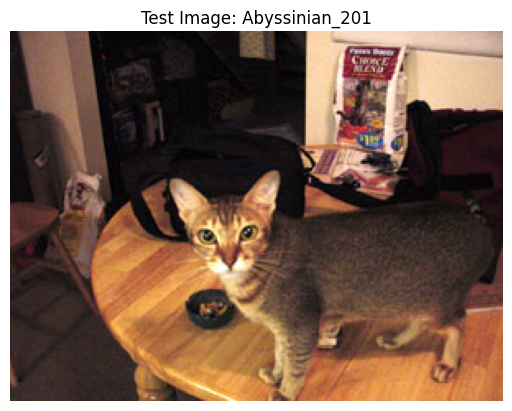

In [4]:
# Test 데이터에서 예제 이미지 불러오기
test_example_image_name = df_test["Image"].iloc[0]
test_image_path = os.path.join(image_dir, f"{test_example_image_name}.jpg")

# 이미지 읽기
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Test 이미지 출력
plt.imshow(test_image)
plt.title(f"Test Image: {test_example_image_name}")
plt.axis("off")
plt.show()

In [5]:
# XML 파일 이름 가져오기 (확장자 제거)
xml_list = [os.path.splitext(file)[0] for file in os.listdir(xml_dir) if file.endswith(".xml")]

# Train 이미지에 대해 XML 파일이 없는 경우 확인
missing_xml = [image for image in trainval_list if image not in xml_list]

# Train 이미지에 대해 XML 파일이 있는 경우 확인
trainval_list = [image for image in trainval_list if image in xml_list]

# 결과 출력
print(f"XML 파일이 없는 Train 이미지 수: {len(missing_xml)}")
print(missing_xml)

XML 파일이 없는 Train 이미지 수: 9
['Abyssinian_104', 'Bengal_111', 'samoyed_10', 'Bengal_175', 'Egyptian_Mau_14', 'Egyptian_Mau_156', 'Egyptian_Mau_186', 'Ragdoll_199', 'saint_bernard_15']


In [6]:
# 모든 XML 파일 처리
annotations = []

for xml_file in xml_files:
    xml_path = os.path.join(xml_dir, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    image_name = root.find("filename").text  # 이미지 파일 이름

    for obj in root.findall("object"):
        class_name = obj.find("name").text
        bndbox = obj.find("bndbox")
        x_min = int(bndbox.find("xmin").text)
        y_min = int(bndbox.find("ymin").text)
        x_max = int(bndbox.find("xmax").text)
        y_max = int(bndbox.find("ymax").text)

        annotations.append({
            "image": image_name,
            "class": class_name,
            "bbox": [x_min, y_min, x_max, y_max]
        })

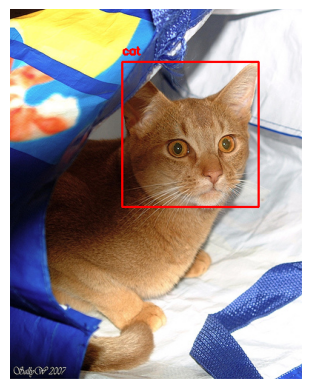

In [7]:
# Train 데이터에서 예제 이미지 불러오기
train_example_image_name = df_trainval["Image"].iloc[0]
train_image_path = os.path.join(image_dir, f"{train_example_image_name}.jpg")

# 이미지 읽기
image = cv2.imread(train_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 해당 이미지의 어노테이션 가져오기
annotations = [anno for anno in annotations if anno["image"] == f"{train_example_image_name}.jpg"]

# Bounding Box 그리기
for anno in annotations:
    x_min, y_min, x_max, y_max = anno["bbox"]
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # 빨간색 박스
    cv2.putText(image, anno["class"], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# 시각화
plt.imshow(image)
plt.axis("off")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Train/Validation 분리 (trainval_list에서 80% Train, 20% Validation으로 나눔)
train_list, valid_list = train_test_split(trainval_list, test_size=0.3, random_state=42)

# 결과 확인
print(f"Train 이미지 수: {len(train_list)}")
print(f"Validation 이미지 수: {len(valid_list)}")
print(f"Test 이미지 수: {len(test_list)}")

# Annotation 개수 확인
xml_files = [file for file in os.listdir(xml_dir) if file.endswith(".xml")]
print(f"XML 파일 개수: {len(xml_files)}")

Train 이미지 수: 2569
Validation 이미지 수: 1102
Test 이미지 수: 3669
XML 파일 개수: 3686


In [ ]:
# ============================================
# VOCDataset
# ============================================
from torch.utils.data import Dataset, DataLoader
class VOCDataset(Dataset):
    """
    - classes에서 직접 인덱스 사용 (background 포함)
    - background=0, dog=1, cat=2
    """
    def __init__(self, image_dir, annotation_dir, classes, image_list, transforms=None, input_size=300):
        self.image_dir = image_dir
        self.annotation_dir = annotation_dir
        self.classes = classes
        self.transforms = transforms
        self.image_files = image_list
        self.input_size = input_size

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_file = self.image_files[idx] + ".jpg"
        annotation_file = self.image_files[idx] + ".xml"
        image_path = os.path.join(self.image_dir, image_file)
        annotation_path = os.path.join(self.annotation_dir, annotation_file)

        image = Image.open(image_path).convert("RGB")
        boxes = []
        labels = []

        try:
            tree = ET.parse(annotation_path)
            root = tree.getroot()
            for obj in root.findall("object"):
                class_name = obj.find("name").text
                if class_name not in self.classes:
                    continue
                # 팀원 방식: classes에서 직접 인덱스 찾기
                labels.append(self.classes.index(class_name))
                bndbox = obj.find("bndbox")
                boxes.append([
                    int(bndbox.find("xmin").text), int(bndbox.find("ymin").text),
                    int(bndbox.find("xmax").text), int(bndbox.find("ymax").text)
                ])
        except Exception:
            # 에러 발생 시 더미 데이터 반환
            return torch.zeros((3,300,300)), {"boxes": torch.zeros((0,4)), "labels": torch.zeros((0,), dtype=torch.int64)}

        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)
        if boxes.numel() == 0:
            boxes = torch.zeros((0, 4), dtype=torch.float32)

        # 원본 이미지 크기
        orig_w, orig_h = image.size

        # Transform 적용
        if self.transforms:
            image = self.transforms(image)

            # 박스 스케일링
            if len(boxes) > 0:
              boxes[:, [0, 2]] *= (self.input_size / orig_w)
              boxes[:, [1, 3]] *= (self.input_size / orig_h)

        target = {"boxes": boxes, "labels": labels}  # 여기서 target 생성

        return image, target

In [ ]:
# ============================================
# Transform 정의 (300, 320 두 가지)
# ============================================
from torchvision.transforms import v2

transform_300 = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(dtype=torch.float32, scale=True),
    v2.Resize(size=(300, 300), antialias=True),
])

transform_320 = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(dtype=torch.float32, scale=True),
    v2.Resize(size=(320, 320), antialias=True),
])

In [ ]:
# ============================================
# Dataset 정의 (300, 320 두 가지)
# ============================================
classes = ['background', 'dog', 'cat']
num_classes = 3  # background 포함

train_dataset_300 = VOCDataset(
    image_dir=image_dir,
    annotation_dir=xml_dir,
    classes=classes,
    image_list=train_list,
    transforms=transform_300
)

valid_dataset_300 = VOCDataset(
    image_dir=image_dir,
    annotation_dir=xml_dir,
    classes=classes,
    image_list=valid_list,
    transforms=transform_300
)

train_dataset_320 = VOCDataset(
    image_dir=image_dir,
    annotation_dir=xml_dir,
    classes=classes,
    image_list=train_list,
    transforms=transform_320
)

valid_dataset_320 = VOCDataset(
    image_dir=image_dir,
    annotation_dir=xml_dir,
    classes=classes,
    image_list=valid_list,
    transforms=transform_320
)

In [ ]:
# ============================================
# DataLoader 생성 (300, 320 두 가지)
# ============================================

def collate_fn(batch):
    return tuple(zip(*batch))

# 300용 데이터셋
train_dataset_300 = VOCDataset(image_dir, xml_dir, classes, train_list,
                                transforms=transform_300, input_size=300)
valid_dataset_300 = VOCDataset(image_dir, xml_dir, classes, valid_list,
                                transforms=transform_300, input_size=300)

# 320용 데이터셋
train_dataset_320 = VOCDataset(image_dir, xml_dir, classes, train_list,
                                transforms=transform_320, input_size=320)
val_dataset_320 = VOCDataset(image_dir, xml_dir, classes, valid_list,
                                transforms=transform_320, input_size=320)

# DataLoader 생성
train_loader_300 = DataLoader(train_dataset_300, batch_size=4, shuffle=True,
                               collate_fn=collate_fn, num_workers=0)
val_loader_300 = DataLoader(valid_dataset_300, batch_size=4, shuffle=False,
                             collate_fn=collate_fn, num_workers=0)

train_loader_320 = DataLoader(train_dataset_320, batch_size=4, shuffle=True,
                               collate_fn=collate_fn, num_workers=0,drop_last=True)
val_loader_320 = DataLoader(valid_dataset_320, batch_size=8, shuffle=False,
                             collate_fn=collate_fn, num_workers=0, drop_last=True)

print(f"DataLoader 생성 완료")
print(f"  300x300용: train={len(train_dataset_300)}, valid={len(valid_dataset_300)}")
print(f"  320x320용: train={len(train_dataset_320)}, valid={len(valid_dataset_320)}")

DataLoader 생성 완료
  300x300용: train=2569, valid=1102
  320x320용: train=2569, valid=1102


In [ ]:
# ============================================
# 모델 팩토리 및 유틸리티 함수
# ============================================

class SSDModelFactory:
    """SSD 모델을 다양한 백본으로 생성"""

    @staticmethod
    def create_ssd_vgg16(num_classes, pretrained=True):
        """VGG16 백본 SSD300"""
        print(f"\n[create_ssd_vgg16] 시작: num_classes={num_classes}")

        from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
        from torchvision.models.detection.ssd import SSDClassificationHead

        if pretrained:
            weights = SSD300_VGG16_Weights.DEFAULT
            model = ssd300_vgg16(weights=None)

            # 백본만 pretrained 가중치 로드
            pretrained_model = ssd300_vgg16(weights=weights)
            model.backbone.load_state_dict(pretrained_model.backbone.state_dict())
            print("[create_ssd_vgg16] Pretrained backbone 로드 완료")
        else:
            model = ssd300_vgg16(weights=None)

        # Classification head 교체
        num_anchors = model.anchor_generator.num_anchors_per_location()
        in_channels = [512, 1024, 512, 256, 256, 256]

        print(f"[create_ssd_vgg16] Head 교체:")
        print(f"  - in_channels: {in_channels}")
        print(f"  - num_anchors: {num_anchors}")
        print(f"  - num_classes: {num_classes}")

        model.head.classification_head = SSDClassificationHead(
            in_channels=in_channels,
            num_anchors=num_anchors,
            num_classes=num_classes
        )

        # Regression head도 교체
        model.head.regression_head = SSDClassificationHead(
            in_channels=in_channels,
            num_anchors=num_anchors,
            num_classes=4  # bbox coordinates
        )

        print("[create_ssd_vgg16] 모델 생성 완료")
        return model

    @staticmethod
    def create_ssd_mobilenet(num_classes, pretrained=True):
        """MobileNetV3 백본 SSDLite320"""
        print(f"\n[create_ssd_mobilenet] 시작: num_classes={num_classes}")

        from torchvision.models.detection import ssdlite320_mobilenet_v3_large, SSDLite320_MobileNet_V3_Large_Weights
        from torchvision.models.detection.ssd import SSDClassificationHead
        import torch.nn as nn
        
        # 1. 기본 모델 생성 (pretrained 여부 무관)
        model = ssdlite320_mobilenet_v3_large(weights=None)
        print("[create_ssd_mobilenet] 모델 생성 완료 (weights=None)")
        
        # 2. 기존 Head 에서 in_channels 자동 추출 (동적 추출)
        def extract_in_channels(block):
            for module in block:
                if isinstance(module, nn.Conv2d):
                    return int(module.in_channels)
                elif hasattr(module, '__iter__'):
                    for sub in module:
                        if isinstance(sub, nn.Conv2d):
                            return int(sub.in_channels)
            return None
        
        in_channels = []
        for m in model.head.classification_head.module_list:
            ch = extract_in_channels(m)
            if ch is None:
                ch = 960 # 기본값
            in_channels.append(ch)
            
        num_anchors = model.anchor_generator.num_anchors_per_location()

        print(f"[create_ssd_mobilenet] 자동 추출:")
        print(f"  - in_channels: {in_channels}")
        print(f"  - num_anchors: {num_anchors}")
        print(f"  - num_classes: {num_classes}")

        # 3. Head 교체
        model.head.classification_head = SSDClassificationHead(
            in_channels=in_channels,
            num_anchors=num_anchors,
            num_classes=num_classes
        )

        model.head.regression_head = SSDClassificationHead(
            in_channels=in_channels,
            num_anchors=num_anchors,
            num_classes=4
        )

        print("[create_ssd_mobilenet] Head 교체 완료")
        return model

In [14]:
# 모델 설정
MODEL_CONFIGS = {
    'SSD300_VGG16': {
        'creator': SSDModelFactory.create_ssd_vgg16,
        'input_size': 300,
        'description': 'VGG16 백본 - 전통적 구조, 높은 정확도'
    },
    'SSDLite320_MobileNetV3': {
        'creator': SSDModelFactory.create_ssd_mobilenet,
        'input_size': 320,
        'description': 'MobileNetV3 백본 - 경량화, 빠른 추론'
        }
}

In [ ]:
# ============================================
# 모델 분석 및 성능 평가 유틸리티
# ============================================

import time
def count_parameters(model):
    """모델의 파라미터 수 계산"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def get_model_size(model, temp_path='temp_model.pth'):
    """모델 크기 측정 (MB)"""
    torch.save(model.state_dict(), temp_path)
    size_mb = os.path.getsize(temp_path) / (1024*1024)
    os.remove(temp_path)
    return size_mb

def measure_fps(model, dataloader, device, num_iterations=100):
    """추론 속도 측정(FPS)"""
    model.eval()
    total_time = 0
    count = 0

    with torch.no_grad():
        for images, _ in dataloader:
            if count >= num_iterations:
                break

            images = [img.to(device) for img in images]

            start_time = time.time()
            _ = model(images)
            total_time += time.time() - start_time

            count += 1

    fps = count/total_time
    return fps

def calculate_iou_single(box1, box2):
    """단일 박스 간 IoU 계산"""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0,x2-x1)*max(0,y2-y1)
    area1 = (box1[2] - box1[0])* (box1[3] - box1[1])
    area2 = (box2[2] - box2[0])*(box2[3] - box2[1])
    union = area1 + area2 - intersection

    return intersection / union if union > 0 else 0

In [ ]:
# ============================================
# 평가 함수 (mAP, Class 별 AP)
# ============================================

from tqdm import tqdm
import numpy as np

def evaluate_model_comprehensive(model, dataloader, classes, device, iou_threshold=0.5, conf_threshold=0.05):
    """
    종합적인 모델 평가
    Args:
        conf_threshold: confidence threshold (기본값 0.05로 낮춤)
    Returns:{
        'mAP' : float,
        'class_aps' : dict,
        'total_predictions' : int,
        'total_ground_truths' : int
    """
    model.eval()

    all_predictions = []
    all_ground_truths = []

    with torch.no_grad():
        for images, targets in tqdm(dataloader, desc='Evaluating'):
            images = [img.to(device) for img in images]
            predictions = model(images)

            # confidence threshold 적용된 예측만 저장
            filtered_predictions = []
            for pred in predictions:
                mask = pred['scores'] > conf_threshold
                filtered_pred = {
                    'boxes': pred['boxes'][mask],
                    'labels': pred['labels'][mask],
                    'scores': pred['scores'][mask]
                }
                filtered_predictions.append(filtered_pred)

            all_predictions.extend(predictions)
            all_ground_truths.extend(targets)

    # 추가
    # object_classes = [c for c in classes if c != 'background']
    # 클래스별 AP 계산
    class_aps = {}

    for class_idx, class_name in enumerate(classes[1:], start=1):
        true_positives = []
        scores = []
        num_ground_truths = 0

        for pred, gt in zip(all_predictions, all_ground_truths):
            # 현재 클래스 필터링
            pred_boxes = pred["boxes"][pred["labels"] == class_idx].cpu().numpy()
            pred_scores = pred["scores"][pred["labels"] == class_idx].cpu().numpy()
            gt_boxes = gt["boxes"][gt["labels"] == class_idx].cpu().numpy()

            num_ground_truths += len(gt_boxes)

            if len(pred_boxes) == 0:
                continue

            matched = np.zeros(len(gt_boxes), dtype=bool)

            for box, score in zip(pred_boxes, pred_scores):
                max_iou = 0
                max_idx = -1

                for idx, gt_box in enumerate(gt_boxes):
                    iou = calculate_iou_single(box, gt_box)
                    if iou> max_iou:
                        max_iou = iou
                        max_idx = idx

                if max_iou >= iou_threshold and max_idx >= 0 and not matched[max_idx]:
                    true_positives.append(1)
                    matched[max_idx] = True
                else:
                    true_positives.append(0)

                scores.append(score)

        # 추가
        print(f"  GT 개수: {num_ground_truths}, 예측 개수: {len(scores)}")

        # AP 계산
        if len(scores) == 0:
            class_aps[class_name] = 0.0
            print(f"  {class_name} AP: 0.0000 (예측 또는 GT 없음)")
            continue

        sorted_indices = np.argsort(-np.array(scores))
        true_positives = np.array(true_positives)[sorted_indices]

        cum_tp = np.cumsum(true_positives)
        cum_fp = np.cumsum(1- true_positives)

        precision = cum_tp / (cum_tp+cum_fp)
        recall = cum_tp / num_ground_truths if num_ground_truths > 0 else np.zeros_like(cum_tp)

        # AP 계산 (11-point interpolation)
        ap = 0.0
        for t in np.arange(0,1.1,0.1):
            if np.sum(recall >= t)==0:
                p=0
            else:
                p = np.max(precision[recall >= t])
            ap += p/11

        class_aps[class_name] = ap
        print(f"  {class_name} AP: {ap:.4f}") # 추가

    mAP = np.mean(list(class_aps.values()))
    print(f"\nmAP: {mAP:.4f}") # 추가

    return {
        'mAP' : mAP,
        'class_aps' : class_aps,
        'total_predictions' : len(all_predictions),
        'total_ground_truths' : len(all_ground_truths)
    }

In [ ]:
# ============================================
# 학습 함수 (Early Stopping 포함)
# ============================================

import time
from tqdm import tqdm

class EarlyStopping:
    def __init__(self, patience=5, verbose=True, delta=0.0, path="checkpoint.pt"):
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.path = path

    def __call__(self, val_map, model):
        score = val_map

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(model)
            self.counter = 0

        return self.early_stop

    def save_checkpoint(self, model):
        if self.verbose:
            print(f"Validation mAP increased. Saving model...")
        torch.save(model.state_dict(), self.path)


def train_model_with_validation(model, train_loader, val_loader, classes, device,
                                  num_epochs=10, model_name='model', patience=5):
    """
    학습 및 검증 (mAP 기반 Early Stopping)
    """
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

    early_stopper = EarlyStopping(patience=patience, verbose=True, path=f'{model_name}_best.pt')

    history = {
        'train_loss': [],
        'val_map': [],
        'val_class_aps': []
    }

    start_time = time.time()

    for epoch in range(num_epochs):
        print(f"\n{'='*60}")
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print(f"{'='*60}")

        # Training
        model.train()
        total_train_loss = 0

        for images, targets in tqdm(train_loader, desc="Training"):
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            total_train_loss += losses.item()

            optimizer.zero_grad()
            losses.backward()
            optimizer.step()

        avg_train_loss = total_train_loss / len(train_loader)
        history['train_loss'].append(avg_train_loss)

        # Validation
        eval_results = evaluate_model_comprehensive(model, val_loader, classes, device)
        val_map = eval_results['mAP']

        history['val_map'].append(val_map)
        history['val_class_aps'].append(eval_results['class_aps'])

        print(f"Train Loss: {avg_train_loss:.4f}")
        print(f"Validation mAP: {val_map:.4f}")
        for class_name, ap in eval_results['class_aps'].items():
            print(f"  {class_name} AP: {ap:.4f}")

        lr_scheduler.step()

        # Early Stopping
        if early_stopper(val_map, model):
            print(f"Early Stopping at epoch {epoch + 1}")
            break

    train_time = time.time() - start_time

    # 최고 모델 로드
    model.load_state_dict(torch.load(f'{model_name}_best.pt'))

    return model, history, train_time

In [ ]:
# ============================================
# History를 CSV로 저장하는 함수
# ============================================

def save_history_to_csv(all_results, output_dir='results'):
    """
    모든 모델의 학습 히스토리를 CSV로 저장

    Args:
        all_results: {model_name: {'history': {...}, ...}}
        output_dir: 저장 디렉토리
    """
    os.makedirs(output_dir, exist_ok=True)

    for model_name, results in all_results.items():
        history = results['history']

        # 데이터프레임 생성
        df = pd.DataFrame({
            'epoch': range(1, len(history['train_loss']) + 1),
            'train_loss': history['train_loss'],
            'val_map': history['val_map']
        })

        # Class별 AP 추가 (있는 경우)
        if 'val_class_aps' in history:
            for epoch_idx, class_aps in enumerate(history['val_class_aps']):
                for class_name, ap_value in class_aps.items():
                    col_name = f'val_ap_{class_name}'
                    if col_name not in df.columns:
                        df[col_name] = 0.0
                    df.loc[epoch_idx, col_name] = ap_value

        # CSV 저장
        csv_path = os.path.join(output_dir, f'{model_name}_history.csv')
        df.to_csv(csv_path, index=False)
        print(f"Saved: {csv_path}")

    print(f"\n모든 히스토리 CSV 저장 완료: {output_dir}/")

In [20]:
# ============================================
# 전체 실험 실행
# ============================================


# 결과 저장용
all_results = {}

print("\n" + "="*80)
print("실험 시작")
print("="*80)
print(f"Classes: {classes}")
print(f"num_classes: {num_classes}")

# 저장 폴더 생성
os.makedirs('model_checkpoints', exist_ok=True)

for model_name, config in MODEL_CONFIGS.items():
    print(f"\n\n{'#'*80}")
    print(f"### 모델: {model_name}")
    print(f"### 설명: {config['description']}")
    print(f"{'#'*80}\n")

    # DataLoader 선택
    if 'VGG16' in model_name:
        current_train_loader = train_loader_300
        current_val_loader = val_loader_300
        input_size = 300
    elif 'MobileNetV3' in model_name:
        current_train_loader = train_loader_320
        current_val_loader = val_loader_320
        input_size = 320
    else:
        print(f"경고: 모델 {model_name}에 대한 DataLoader가 정의되지 않았습니다. 건너뜁니다.")
        continue

    print(f"-> 입력 크기: {input_size}x{input_size}의 DataLoader 사용")

    # 1. 모델 생성
    print(f"\n[STEP 1] 모델 생성 중... (num_classes={num_classes})")
    try:
        model = config['creator'](num_classes=num_classes, pretrained=True)
        print(f"모델 생성 완료")
    except Exception as e:
        print(f"모델 생성 실패: {e}")
        import traceback
        traceback.print_exc()
        continue

    # 2. GPU 전송
    print(f"\n[STEP 2] GPU로 모델 전송 중...")
    try:
        model = model.to(device)
        print(f"GPU 전송 완료 (device: {device})")
    except Exception as e:
        print(f"GPU 전송 실패: {e}")
        import traceback
        traceback.print_exc()
        continue

    # 3. 간단한 forward pass 테스트
    print(f"\n[STEP 3] Forward pass 테스트 중...")
    try:
        model.eval()
        test_images, test_targets = next(iter(current_val_loader))
        test_images = [img.to(device) for img in test_images]

        with torch.no_grad():
            predictions = model(test_images)

        print(f"Forward pass 성공! Predictions: {len(predictions)}")
    except Exception as e:
        print(f"Forward pass 실패: {e}")
        import traceback
        traceback.print_exc()
        continue

    # 여기까지 성공하면 학습 진행
    print(f"\n[STEP 4] 학습 시작...")

    # 2. 학습
    model, history, train_time = train_model_with_validation(
        model,
        current_train_loader,
        current_val_loader,
        classes,
        device,
        num_epochs=10,
        model_name=f'model_checkpoints/{model_name}',
        patience=5
    )

    # 3. 테스트 평가 (val_loader를 사용하여 테스트 성능 측정)
    print(f"\n{'='*60}")
    print(f"Testing {model_name}")
    print(f"{'='*60}")

    # evaluate_model_comprehensive에도 올바른 DataLoader 전달
    test_results = evaluate_model_comprehensive(model, current_val_loader, classes, device)

    # 4. 효율성 측정
    params = count_parameters(model)
    model_size = get_model_size(model, f'model_checkpoints/{model_name}_size.pth')

    # FPS 측정 시에도 올바른 DataLoader 사용 (샘플링 일관성을 위해)
    fps = measure_fps(model, current_val_loader, device, num_iterations=50)

    # 5. 결과 저장
    all_results[model_name] = {
        'test_mAP': test_results['mAP'],
        'class_aps': test_results['class_aps'],
        'params': params,
        'model_size_mb': model_size,
        'fps': fps,
        'train_time': train_time,
        'history': history
    }

    # 6. 결과 출력
    print(f"\n### {model_name} 최종 결과 ###")
    print(f"Test mAP: {test_results['mAP']:.4f}")
    for class_name, ap in test_results['class_aps'].items():
        print(f"  {class_name} AP: {ap:.4f}")
    print(f"Parameters: {params/1e6:.2f}M")
    print(f"Model Size: {model_size:.2f} MB")
    print(f"FPS: {fps:.2f}")
    print(f"Training Time: {train_time/60:.2f} min")


실험 시작
Classes: ['background', 'dog', 'cat']
num_classes: 3


################################################################################
### 모델: SSD300_VGG16
### 설명: VGG16 백본 - 전통적 구조, 높은 정확도
################################################################################

-> 입력 크기: 300x300의 DataLoader 사용

[STEP 1] 모델 생성 중... (num_classes=3)

[create_ssd_vgg16] 시작: num_classes=3
[create_ssd_vgg16] Pretrained backbone 로드 완료
[create_ssd_vgg16] Head 교체:
  - in_channels: [512, 1024, 512, 256, 256, 256]
  - num_anchors: [4, 6, 6, 6, 4, 4]
  - num_classes: 3
[create_ssd_vgg16] 모델 생성 완료
모델 생성 완료

[STEP 2] GPU로 모델 전송 중...
GPU 전송 완료 (device: cuda)

[STEP 3] Forward pass 테스트 중...
Forward pass 성공! Predictions: 4

[STEP 4] 학습 시작...

Epoch 1/10


Evaluating: 100%|██████████| 276/276 [00:23<00:00, 11.87it/s]


  GT 개수: 741, 예측 개수: 129250
  dog AP: 0.8808
  GT 개수: 362, 예측 개수: 91150
  cat AP: 0.8812

mAP: 0.8810
Train Loss: 4.1450
Validation mAP: 0.8810
  dog AP: 0.8808
  cat AP: 0.8812
Validation mAP increased. Saving model...

Epoch 2/10


Evaluating: 100%|██████████| 276/276 [00:23<00:00, 11.84it/s]


  GT 개수: 741, 예측 개수: 105974
  dog AP: 0.9013
  GT 개수: 362, 예측 개수: 78468
  cat AP: 0.9080

mAP: 0.9046
Train Loss: 2.2646
Validation mAP: 0.9046
  dog AP: 0.9013
  cat AP: 0.9080
Validation mAP increased. Saving model...

Epoch 3/10


Evaluating: 100%|██████████| 276/276 [00:23<00:00, 11.90it/s]


  GT 개수: 741, 예측 개수: 15384
  dog AP: 0.9020
  GT 개수: 362, 예측 개수: 7229
  cat AP: 0.9080

mAP: 0.9050
Train Loss: 1.6900
Validation mAP: 0.9050
  dog AP: 0.9020
  cat AP: 0.9080
Validation mAP increased. Saving model...

Epoch 4/10


Evaluating: 100%|██████████| 276/276 [00:23<00:00, 11.82it/s]


  GT 개수: 741, 예측 개수: 3680
  dog AP: 0.9050
  GT 개수: 362, 예측 개수: 1956
  cat AP: 0.9091

mAP: 0.9071
Train Loss: 0.9921
Validation mAP: 0.9071
  dog AP: 0.9050
  cat AP: 0.9091
Validation mAP increased. Saving model...

Epoch 5/10


Evaluating: 100%|██████████| 276/276 [00:23<00:00, 11.62it/s]


  GT 개수: 741, 예측 개수: 2270
  dog AP: 0.9046
  GT 개수: 362, 예측 개수: 1270
  cat AP: 0.9091

mAP: 0.9069
Train Loss: 0.8217
Validation mAP: 0.9069
  dog AP: 0.9046
  cat AP: 0.9091
EarlyStopping counter: 1/5

Epoch 6/10


Evaluating: 100%|██████████| 276/276 [00:23<00:00, 11.87it/s]


  GT 개수: 741, 예측 개수: 1604
  dog AP: 0.9050
  GT 개수: 362, 예측 개수: 878
  cat AP: 0.9091

mAP: 0.9071
Train Loss: 0.7412
Validation mAP: 0.9071
  dog AP: 0.9050
  cat AP: 0.9091
EarlyStopping counter: 2/5

Epoch 7/10


Evaluating: 100%|██████████| 276/276 [00:22<00:00, 12.21it/s]


  GT 개수: 741, 예측 개수: 1610
  dog AP: 0.9048
  GT 개수: 362, 예측 개수: 879
  cat AP: 0.9091

mAP: 0.9070
Train Loss: 0.6740
Validation mAP: 0.9070
  dog AP: 0.9048
  cat AP: 0.9091
EarlyStopping counter: 3/5

Epoch 8/10


Evaluating: 100%|██████████| 276/276 [00:23<00:00, 11.80it/s]


  GT 개수: 741, 예측 개수: 1585
  dog AP: 0.9048
  GT 개수: 362, 예측 개수: 864
  cat AP: 0.9091

mAP: 0.9070
Train Loss: 0.6649
Validation mAP: 0.9070
  dog AP: 0.9048
  cat AP: 0.9091
EarlyStopping counter: 4/5

Epoch 9/10


Evaluating: 100%|██████████| 276/276 [00:22<00:00, 12.15it/s]


  GT 개수: 741, 예측 개수: 1575
  dog AP: 0.9049
  GT 개수: 362, 예측 개수: 845
  cat AP: 0.9091

mAP: 0.9070
Train Loss: 0.6594
Validation mAP: 0.9070
  dog AP: 0.9049
  cat AP: 0.9091
EarlyStopping counter: 5/5
Early Stopping at epoch 9


C:\Users\w00sh\AppData\Local\Temp\ipykernel_25156\40983217.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{model_name}_best.pt'))



Testing SSD300_VGG16


Evaluating: 100%|██████████| 276/276 [00:22<00:00, 12.13it/s]


  GT 개수: 741, 예측 개수: 3680
  dog AP: 0.9050
  GT 개수: 362, 예측 개수: 1956
  cat AP: 0.9091

mAP: 0.9071

### SSD300_VGG16 최종 결과 ###
Test mAP: 0.9071
  dog AP: 0.9050
  cat AP: 0.9091
Parameters: 23.84M
Model Size: 91.12 MB
FPS: 15.58
Training Time: 18.25 min


################################################################################
### 모델: SSDLite320_MobileNetV3
### 설명: MobileNetV3 백본 - 경량화, 빠른 추론
################################################################################

-> 입력 크기: 320x320의 DataLoader 사용

[STEP 1] 모델 생성 중... (num_classes=3)

[create_ssd_mobilenet] 시작: num_classes=3
[create_ssd_mobilenet] 모델 생성 완료 (weights=None)
[create_ssd_mobilenet] 자동 추출:
  - in_channels: [672, 960, 512, 256, 256, 128]
  - num_anchors: [6, 6, 6, 6, 6, 6]
  - num_classes: 3
[create_ssd_mobilenet] Head 교체 완료
모델 생성 완료

[STEP 2] GPU로 모델 전송 중...
GPU 전송 완료 (device: cuda)

[STEP 3] Forward pass 테스트 중...
Forward pass 성공! Predictions: 8

[STEP 4] 학습 시작...

Epoch 1/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.24it/s]


  GT 개수: 738, 예측 개수: 105917
  dog AP: 0.7669
  GT 개수: 359, 예측 개수: 117804
  cat AP: 0.8106

mAP: 0.7887
Train Loss: 4.7035
Validation mAP: 0.7887
  dog AP: 0.7669
  cat AP: 0.8106
Validation mAP increased. Saving model...

Epoch 2/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.42it/s]


  GT 개수: 738, 예측 개수: 92416
  dog AP: 0.8678
  GT 개수: 359, 예측 개수: 106528
  cat AP: 0.8554

mAP: 0.8616
Train Loss: 2.8129
Validation mAP: 0.8616
  dog AP: 0.8678
  cat AP: 0.8554
Validation mAP increased. Saving model...

Epoch 3/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.16it/s]


  GT 개수: 738, 예측 개수: 88766
  dog AP: 0.8845
  GT 개수: 359, 예측 개수: 106746
  cat AP: 0.8816

mAP: 0.8831
Train Loss: 2.3064
Validation mAP: 0.8831
  dog AP: 0.8845
  cat AP: 0.8816
Validation mAP increased. Saving model...

Epoch 4/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.76it/s]


  GT 개수: 738, 예측 개수: 92626
  dog AP: 0.8795
  GT 개수: 359, 예측 개수: 112577
  cat AP: 0.8881

mAP: 0.8838
Train Loss: 1.8328
Validation mAP: 0.8838
  dog AP: 0.8795
  cat AP: 0.8881
Validation mAP increased. Saving model...

Epoch 5/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.91it/s]


  GT 개수: 738, 예측 개수: 91966
  dog AP: 0.8890
  GT 개수: 359, 예측 개수: 111371
  cat AP: 0.8816

mAP: 0.8853
Train Loss: 1.7628
Validation mAP: 0.8853
  dog AP: 0.8890
  cat AP: 0.8816
Validation mAP increased. Saving model...

Epoch 6/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.73it/s]


  GT 개수: 738, 예측 개수: 93728
  dog AP: 0.8901
  GT 개수: 359, 예측 개수: 114784
  cat AP: 0.8944

mAP: 0.8922
Train Loss: 1.7092
Validation mAP: 0.8922
  dog AP: 0.8901
  cat AP: 0.8944
Validation mAP increased. Saving model...

Epoch 7/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.79it/s]


  GT 개수: 738, 예측 개수: 93339
  dog AP: 0.8899
  GT 개수: 359, 예측 개수: 113104
  cat AP: 0.8927

mAP: 0.8913
Train Loss: 1.6617
Validation mAP: 0.8913
  dog AP: 0.8899
  cat AP: 0.8927
EarlyStopping counter: 1/5

Epoch 8/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.42it/s]


  GT 개수: 738, 예측 개수: 94332
  dog AP: 0.8863
  GT 개수: 359, 예측 개수: 114466
  cat AP: 0.8901

mAP: 0.8882
Train Loss: 1.6637
Validation mAP: 0.8882
  dog AP: 0.8863
  cat AP: 0.8901
EarlyStopping counter: 2/5

Epoch 9/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.34it/s]


  GT 개수: 738, 예측 개수: 93914
  dog AP: 0.8863
  GT 개수: 359, 예측 개수: 112971
  cat AP: 0.8907

mAP: 0.8885
Train Loss: 1.6530
Validation mAP: 0.8885
  dog AP: 0.8863
  cat AP: 0.8907
EarlyStopping counter: 3/5

Epoch 10/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.24it/s]


  GT 개수: 738, 예측 개수: 93875
  dog AP: 0.8869
  GT 개수: 359, 예측 개수: 113927
  cat AP: 0.8901

mAP: 0.8885
Train Loss: 1.6465
Validation mAP: 0.8885
  dog AP: 0.8869
  cat AP: 0.8901
EarlyStopping counter: 4/5

Testing SSDLite320_MobileNetV3


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 13.86it/s]


  GT 개수: 738, 예측 개수: 93728
  dog AP: 0.8901
  GT 개수: 359, 예측 개수: 114784
  cat AP: 0.8944

mAP: 0.8922

### SSDLite320_MobileNetV3 최종 결과 ###
Test mAP: 0.8922
  dog AP: 0.8901
  cat AP: 0.8944
Parameters: 4.60M
Model Size: 17.80 MB
FPS: 28.12
Training Time: 7.04 min


In [19]:
# ====================================
# MoblieNet 만 학습
# ====================================

# 결과 저장용
all_results = {}

print("\n" + "="*80)
print("실험 시작")
print("="*80)
print(f"Classes: {classes}")
print(f"num_classes: {num_classes}")

# 저장 폴더 생성
os.makedirs('model_checkpoints', exist_ok=True)

for model_name, config in MODEL_CONFIGS.items():
    print(f"\n\n{'#'*80}")
    print(f"### 모델: {model_name}")
    print(f"### 설명: {config['description']}")
    print(f"{'#'*80}\n")

    # DataLoader 선택
    if 'MobileNetV3' in model_name:
        current_train_loader = train_loader_320
        current_val_loader = val_loader_320
        input_size = 320
    else:
        print(f"경고: 모델 {model_name}에 대한 DataLoader가 정의되지 않았습니다. 건너뜁니다.")
        continue

    print(f"-> 입력 크기: {input_size}x{input_size}의 DataLoader 사용")

    # 1. 모델 생성
    print(f"\n[STEP 1] 모델 생성 중... (num_classes={num_classes})")
    try:
        model = config['creator'](num_classes=num_classes, pretrained=True)
        print(f"모델 생성 완료")
    except Exception as e:
        print(f"모델 생성 실패: {e}")
        import traceback
        traceback.print_exc()
        continue

    # 2. GPU 전송
    print(f"\n[STEP 2] GPU로 모델 전송 중...")
    try:
        model = model.to(device)
        print(f"GPU 전송 완료 (device: {device})")
    except Exception as e:
        print(f"GPU 전송 실패: {e}")
        import traceback
        traceback.print_exc()
        continue

    # 3. 간단한 forward pass 테스트
    print(f"\n[STEP 3] Forward pass 테스트 중...")
    try:
        model.eval()
        test_images, test_targets = next(iter(current_val_loader))
        test_images = [img.to(device) for img in test_images]

        with torch.no_grad():
            predictions = model(test_images)

        print(f"Forward pass 성공! Predictions: {len(predictions)}")
    except Exception as e:
        print(f"Forward pass 실패: {e}")
        import traceback
        traceback.print_exc()
        continue

    # 여기까지 성공하면 학습 진행
    print(f"\n[STEP 4] 학습 시작...")

    # 2. 학습
    model, history, train_time = train_model_with_validation(
        model,
        current_train_loader,
        current_val_loader,
        classes,
        device,
        num_epochs=10,
        model_name=f'model_checkpoints/{model_name}',
        patience=5
    )

    # 3. 테스트 평가 (val_loader를 사용하여 테스트 성능 측정)
    print(f"\n{'='*60}")
    print(f"Testing {model_name}")
    print(f"{'='*60}")

    # evaluate_model_comprehensive에도 올바른 DataLoader 전달
    test_results = evaluate_model_comprehensive(model, current_val_loader, classes, device)

    # 4. 효율성 측정
    params = count_parameters(model)
    model_size = get_model_size(model, f'model_checkpoints/{model_name}_size.pth')

    # FPS 측정 시에도 올바른 DataLoader 사용 (샘플링 일관성을 위해)
    fps = measure_fps(model, current_val_loader, device, num_iterations=50)

    # 5. 결과 저장
    all_results[model_name] = {
        'test_mAP': test_results['mAP'],
        'class_aps': test_results['class_aps'],
        'params': params,
        'model_size_mb': model_size,
        'fps': fps,
        'train_time': train_time,
        'history': history
    }

    # 6. 결과 출력
    print(f"\n### {model_name} 최종 결과 ###")
    print(f"Test mAP: {test_results['mAP']:.4f}")
    for class_name, ap in test_results['class_aps'].items():
        print(f"  {class_name} AP: {ap:.4f}")
    print(f"Parameters: {params/1e6:.2f}M")
    print(f"Model Size: {model_size:.2f} MB")
    print(f"FPS: {fps:.2f}")
    print(f"Training Time: {train_time/60:.2f} min")


실험 시작
Classes: ['background', 'dog', 'cat']
num_classes: 3


################################################################################
### 모델: SSD300_VGG16
### 설명: VGG16 백본 - 전통적 구조, 높은 정확도
################################################################################

경고: 모델 SSD300_VGG16에 대한 DataLoader가 정의되지 않았습니다. 건너뜁니다.


################################################################################
### 모델: SSDLite320_MobileNetV3
### 설명: MobileNetV3 백본 - 경량화, 빠른 추론
################################################################################

-> 입력 크기: 320x320의 DataLoader 사용

[STEP 1] 모델 생성 중... (num_classes=3)

[create_ssd_mobilenet] 시작: num_classes=3
[create_ssd_mobilenet] 모델 생성 완료 (weights=None)
[create_ssd_mobilenet] 자동 추출:
  - in_channels: [672, 960, 512, 256, 256, 128]
  - num_anchors: [6, 6, 6, 6, 6, 6]
  - num_classes: 3
[create_ssd_mobilenet] Head 교체 완료
모델 생성 완료

[STEP 2] GPU로 모델 전송 중...
GPU 전송 완료 (device: cuda)

[STEP 3] Forward pass 테스트 중...
Forward pass 성공

Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.80it/s]


  GT 개수: 738, 예측 개수: 107019
  dog AP: 0.8122
  GT 개수: 359, 예측 개수: 108245
  cat AP: 0.8406

mAP: 0.8264
Train Loss: 4.6601
Validation mAP: 0.8264
  dog AP: 0.8122
  cat AP: 0.8406
Validation mAP increased. Saving model...

Epoch 2/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.49it/s]


  GT 개수: 738, 예측 개수: 91555
  dog AP: 0.8268
  GT 개수: 359, 예측 개수: 102637
  cat AP: 0.8718

mAP: 0.8493
Train Loss: 2.7920
Validation mAP: 0.8493
  dog AP: 0.8268
  cat AP: 0.8718
Validation mAP increased. Saving model...

Epoch 3/10


Evaluating: 100%|██████████| 137/137 [00:10<00:00, 13.27it/s]


  GT 개수: 738, 예측 개수: 92215
  dog AP: 0.8587
  GT 개수: 359, 예측 개수: 104824
  cat AP: 0.8670

mAP: 0.8628
Train Loss: 2.2887
Validation mAP: 0.8628
  dog AP: 0.8587
  cat AP: 0.8670
Validation mAP increased. Saving model...

Epoch 4/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 13.72it/s]


  GT 개수: 738, 예측 개수: 90921
  dog AP: 0.8673
  GT 개수: 359, 예측 개수: 104806
  cat AP: 0.8762

mAP: 0.8718
Train Loss: 1.8155
Validation mAP: 0.8718
  dog AP: 0.8673
  cat AP: 0.8762
Validation mAP increased. Saving model...

Epoch 5/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.08it/s]


  GT 개수: 738, 예측 개수: 91461
  dog AP: 0.8814
  GT 개수: 359, 예측 개수: 104522
  cat AP: 0.8783

mAP: 0.8798
Train Loss: 1.7474
Validation mAP: 0.8798
  dog AP: 0.8814
  cat AP: 0.8783
Validation mAP increased. Saving model...

Epoch 6/10


Evaluating: 100%|██████████| 137/137 [00:10<00:00, 13.52it/s]


  GT 개수: 738, 예측 개수: 92110
  dog AP: 0.8812
  GT 개수: 359, 예측 개수: 105439
  cat AP: 0.8827

mAP: 0.8820
Train Loss: 1.7037
Validation mAP: 0.8820
  dog AP: 0.8812
  cat AP: 0.8827
Validation mAP increased. Saving model...

Epoch 7/10


Evaluating: 100%|██████████| 137/137 [00:15<00:00,  8.90it/s]


  GT 개수: 738, 예측 개수: 91668
  dog AP: 0.8819
  GT 개수: 359, 예측 개수: 104196
  cat AP: 0.8799

mAP: 0.8809
Train Loss: 1.6708
Validation mAP: 0.8809
  dog AP: 0.8819
  cat AP: 0.8799
EarlyStopping counter: 1/5

Epoch 8/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.48it/s]


  GT 개수: 738, 예측 개수: 91716
  dog AP: 0.8789
  GT 개수: 359, 예측 개수: 105325
  cat AP: 0.8798

mAP: 0.8794
Train Loss: 1.6781
Validation mAP: 0.8794
  dog AP: 0.8789
  cat AP: 0.8798
EarlyStopping counter: 2/5

Epoch 9/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.40it/s]


  GT 개수: 738, 예측 개수: 92128
  dog AP: 0.8782
  GT 개수: 359, 예측 개수: 105246
  cat AP: 0.8782

mAP: 0.8782
Train Loss: 1.6508
Validation mAP: 0.8782
  dog AP: 0.8782
  cat AP: 0.8782
EarlyStopping counter: 3/5

Epoch 10/10


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.74it/s]


  GT 개수: 738, 예측 개수: 92249
  dog AP: 0.8802


C:\Users\w00sh\AppData\Local\Temp\ipykernel_25156\40983217.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{model_name}_best.pt'))


  GT 개수: 359, 예측 개수: 105003
  cat AP: 0.8749

mAP: 0.8775
Train Loss: 1.6528
Validation mAP: 0.8775
  dog AP: 0.8802
  cat AP: 0.8749
EarlyStopping counter: 4/5

Testing SSDLite320_MobileNetV3


Evaluating: 100%|██████████| 137/137 [00:09<00:00, 14.05it/s]


  GT 개수: 738, 예측 개수: 92110
  dog AP: 0.8812
  GT 개수: 359, 예측 개수: 105439
  cat AP: 0.8827

mAP: 0.8820

### SSDLite320_MobileNetV3 최종 결과 ###
Test mAP: 0.8820
  dog AP: 0.8812
  cat AP: 0.8827
Parameters: 4.60M
Model Size: 17.80 MB
FPS: 28.42
Training Time: 7.90 min


In [21]:
# ============================================
# 학습 곡선 시각화 함수
# ============================================

def plot_training_curves(all_results, output_dir='results'):
    """
    모든 모델의 학습 곡선 시각화
    - Train Loss 곡선
    - Validation mAP 곡선
    - Class별 AP 곡선
    """
    os.makedirs(output_dir, exist_ok=True)

    # 스타일 설정
    plt.style.use('seaborn-v0_8-darkgrid')
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # 1. Train Loss 비교
    plt.figure(figsize=(12, 6))
    for idx, (model_name, results) in enumerate(all_results.items()):
        history = results['history']
        epochs = range(1, len(history['train_loss']) + 1)
        plt.plot(epochs, history['train_loss'],
                marker='o', label=model_name, color=colors[idx], linewidth=2)

    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Train Loss', fontsize=12)
    plt.title('Training Loss Comparison', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'train_loss_comparison.png'), dpi=300)
    print(f"Saved: {output_dir}/train_loss_comparison.png")
    plt.close()

    # 2. Validation mAP 비교
    plt.figure(figsize=(12, 6))
    for idx, (model_name, results) in enumerate(all_results.items()):
        history = results['history']
        epochs = range(1, len(history['val_map']) + 1)
        plt.plot(epochs, history['val_map'],
                marker='s', label=model_name, color=colors[idx], linewidth=2)

    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Validation mAP', fontsize=12)
    plt.title('Validation mAP Comparison', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'val_map_comparison.png'), dpi=300)
    print(f"Saved: {output_dir}/val_map_comparison.png")
    plt.close()

    # 3. 개별 모델의 상세 곡선
    for model_name, results in all_results.items():
        history = results['history']
        epochs = range(1, len(history['train_loss']) + 1)

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'{model_name} - Training Details', fontsize=16, fontweight='bold')

        # (0,0) Train Loss
        axes[0, 0].plot(epochs, history['train_loss'], marker='o', color='#1f77b4', linewidth=2)
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].set_title('Train Loss')
        axes[0, 0].grid(True, alpha=0.3)

        # (0,1) Validation mAP
        axes[0, 1].plot(epochs, history['val_map'], marker='s', color='#ff7f0e', linewidth=2)
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('mAP')
        axes[0, 1].set_title('Validation mAP')
        axes[0, 1].grid(True, alpha=0.3)

        # (1,0) Class별 AP
        if 'val_class_aps' in history:
            for class_name in ['cat', 'dog']:
                class_aps = [epoch_aps.get(class_name, 0.0)
                           for epoch_aps in history['val_class_aps']]
                axes[1, 0].plot(epochs, class_aps, marker='d', label=class_name, linewidth=2)
            axes[1, 0].set_xlabel('Epoch')
            axes[1, 0].set_ylabel('AP')
            axes[1, 0].set_title('Class-wise AP')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)

        # (1,1) Loss vs mAP
        ax2 = axes[1, 1].twinx()
        axes[1, 1].plot(epochs, history['train_loss'], marker='o',
                       color='#1f77b4', label='Train Loss', linewidth=2)
        ax2.plot(epochs, history['val_map'], marker='s',
                color='#ff7f0e', label='Val mAP', linewidth=2)
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Train Loss', color='#1f77b4')
        ax2.set_ylabel('Val mAP', color='#ff7f0e')
        axes[1, 1].set_title('Loss vs mAP')
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'{model_name}_details.png'), dpi=300)
        print(f"Saved: {output_dir}/{model_name}_details.png")
        plt.close()

In [22]:
# ============================================
# 모델 비교표 생성
# ============================================

def create_comparison_table(all_results, output_dir='results'):
    """
    모델 성능 비교표 생성 및 저장
    """
    os.makedirs(output_dir, exist_ok=True)

    # 데이터 수집
    comparison_data = []
    for model_name, results in all_results.items():
        row = {
            'Model': model_name,
            'Test mAP': f"{results['test_mAP']:.4f}",
            'Cat AP': f"{results['class_aps']['cat']:.4f}",
            'Dog AP': f"{results['class_aps']['dog']:.4f}",
            'Parameters (M)': f"{results['params'] / 1e6:.2f}",
            'Model Size (MB)': f"{results['model_size_mb']:.2f}",
            'FPS': f"{results['fps']:.2f}",
            'Train Time (min)': f"{results['train_time'] / 60:.2f}"
        }
        comparison_data.append(row)

    df = pd.DataFrame(comparison_data)

    # CSV 저장
    csv_path = os.path.join(output_dir, 'model_comparison.csv')
    df.to_csv(csv_path, index=False)
    print(f"\nSaved: {csv_path}")

    # 콘솔 출력
    print("\n" + "="*100)
    print("모델 성능 비교표")
    print("="*100)
    print(df.to_string(index=False))
    print("="*100)

    # 시각화 (막대 그래프)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

    metrics = [
        ('Test mAP', 'test_mAP', axes[0, 0]),
        ('Cat AP', 'class_aps', axes[0, 1]),
        ('Dog AP', 'class_aps', axes[0, 2]),
        ('FPS', 'fps', axes[1, 0]),
        ('Parameters (M)', 'params', axes[1, 1]),
        ('Model Size (MB)', 'model_size_mb', axes[1, 2])
    ]

    model_names = list(all_results.keys())
    x_pos = np.arange(len(model_names))

    for metric_name, key, ax in metrics:
        if key == 'class_aps':
            if 'Cat' in metric_name:
                values = [all_results[m]['class_aps']['cat'] for m in model_names]
            else:
                values = [all_results[m]['class_aps']['dog'] for m in model_names]
        elif key == 'params':
            values = [all_results[m][key] / 1e6 for m in model_names]
        else:
            values = [all_results[m][key] for m in model_names]

        bars = ax.bar(x_pos, values, color=['#1f77b4', '#ff7f0e'])
        ax.set_xticks(x_pos)
        ax.set_xticklabels(model_names, rotation=15, ha='right')
        ax.set_ylabel(metric_name)
        ax.set_title(metric_name)
        ax.grid(axis='y', alpha=0.3)

        # 막대 위에 값 표시
        for i, (bar, val) in enumerate(zip(bars, values)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{val:.2f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'model_comparison_chart.png'), dpi=300)
    print(f"Saved: {output_dir}/model_comparison_chart.png")
    plt.close()

    return df


학습된 모델 예측 시각화

[create_ssd_vgg16] 시작: num_classes=3
[create_ssd_vgg16] Pretrained backbone 로드 완료
[create_ssd_vgg16] Head 교체:
  - in_channels: [512, 1024, 512, 256, 256, 256]
  - num_anchors: [4, 6, 6, 6, 4, 4]
  - num_classes: 3
[create_ssd_vgg16] 모델 생성 완료


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].


 시각화 저장: prediction_comparison.png


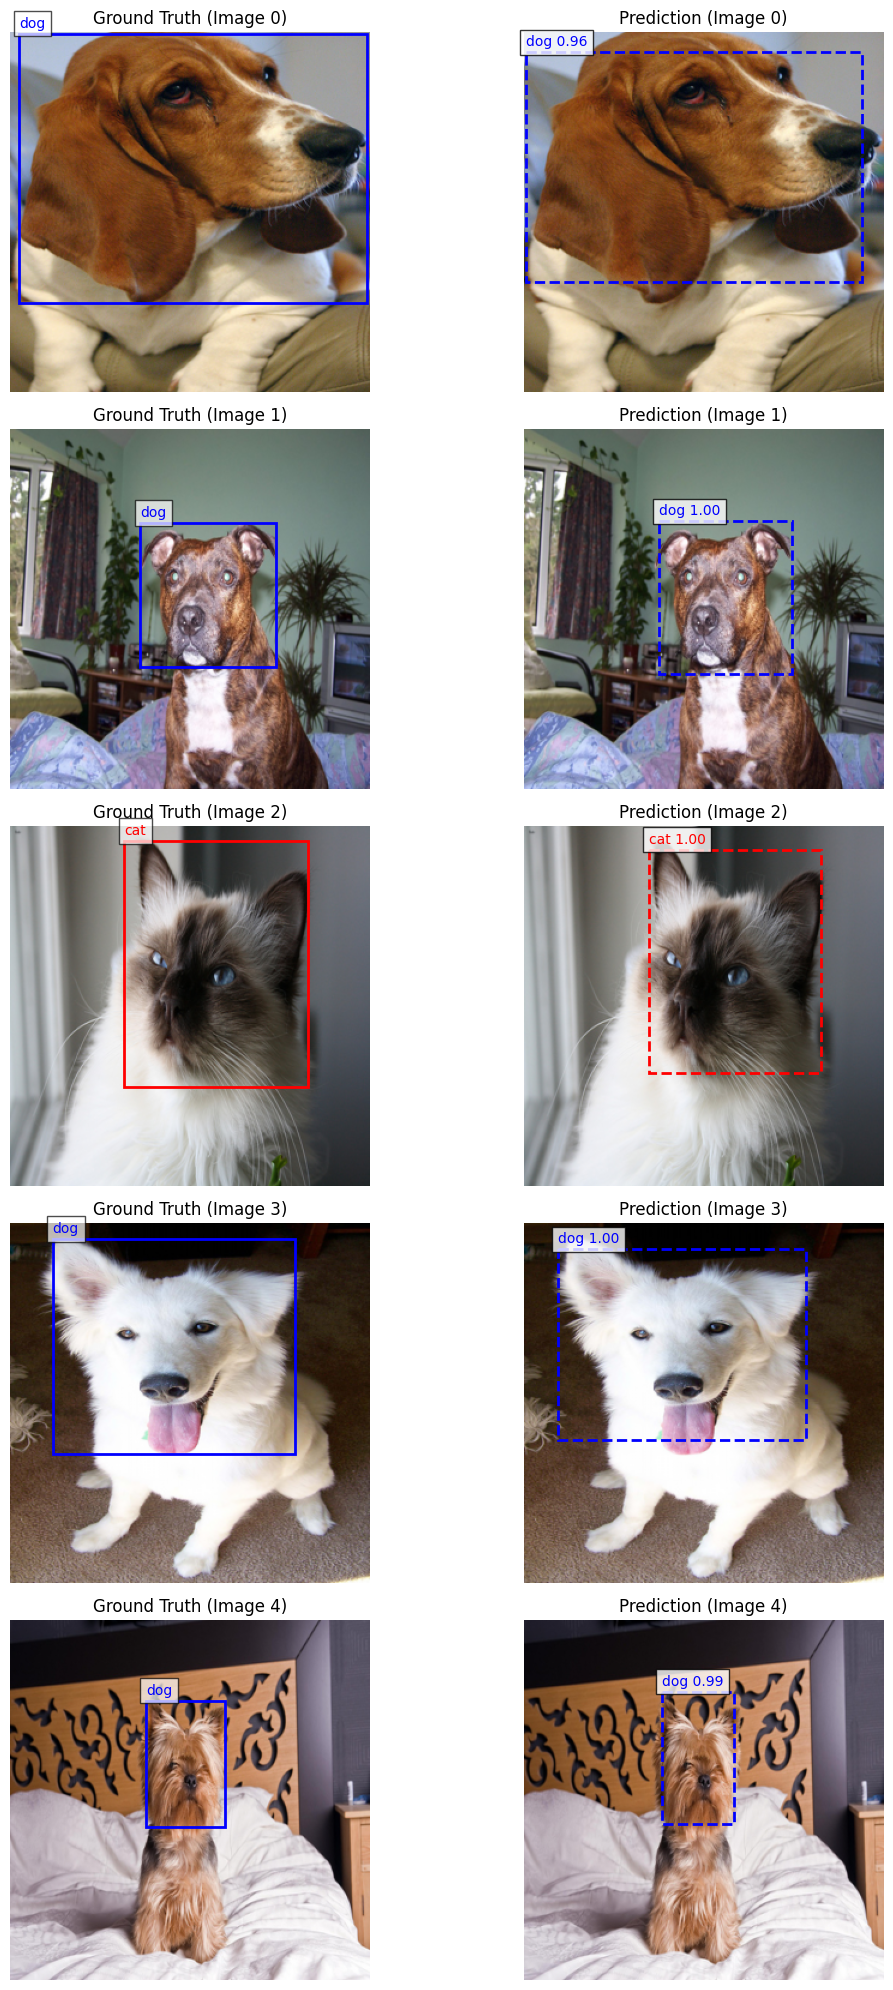


[create_ssd_mobilenet] 시작: num_classes=3
[create_ssd_mobilenet] 모델 생성 완료 (weights=None)
[create_ssd_mobilenet] 자동 추출:
  - in_channels: [672, 960, 512, 256, 256, 128]
  - num_anchors: [6, 6, 6, 6, 6, 6]
  - num_classes: 3
[create_ssd_mobilenet] Head 교체 완료


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000002].


 시각화 저장: prediction_comparison.png


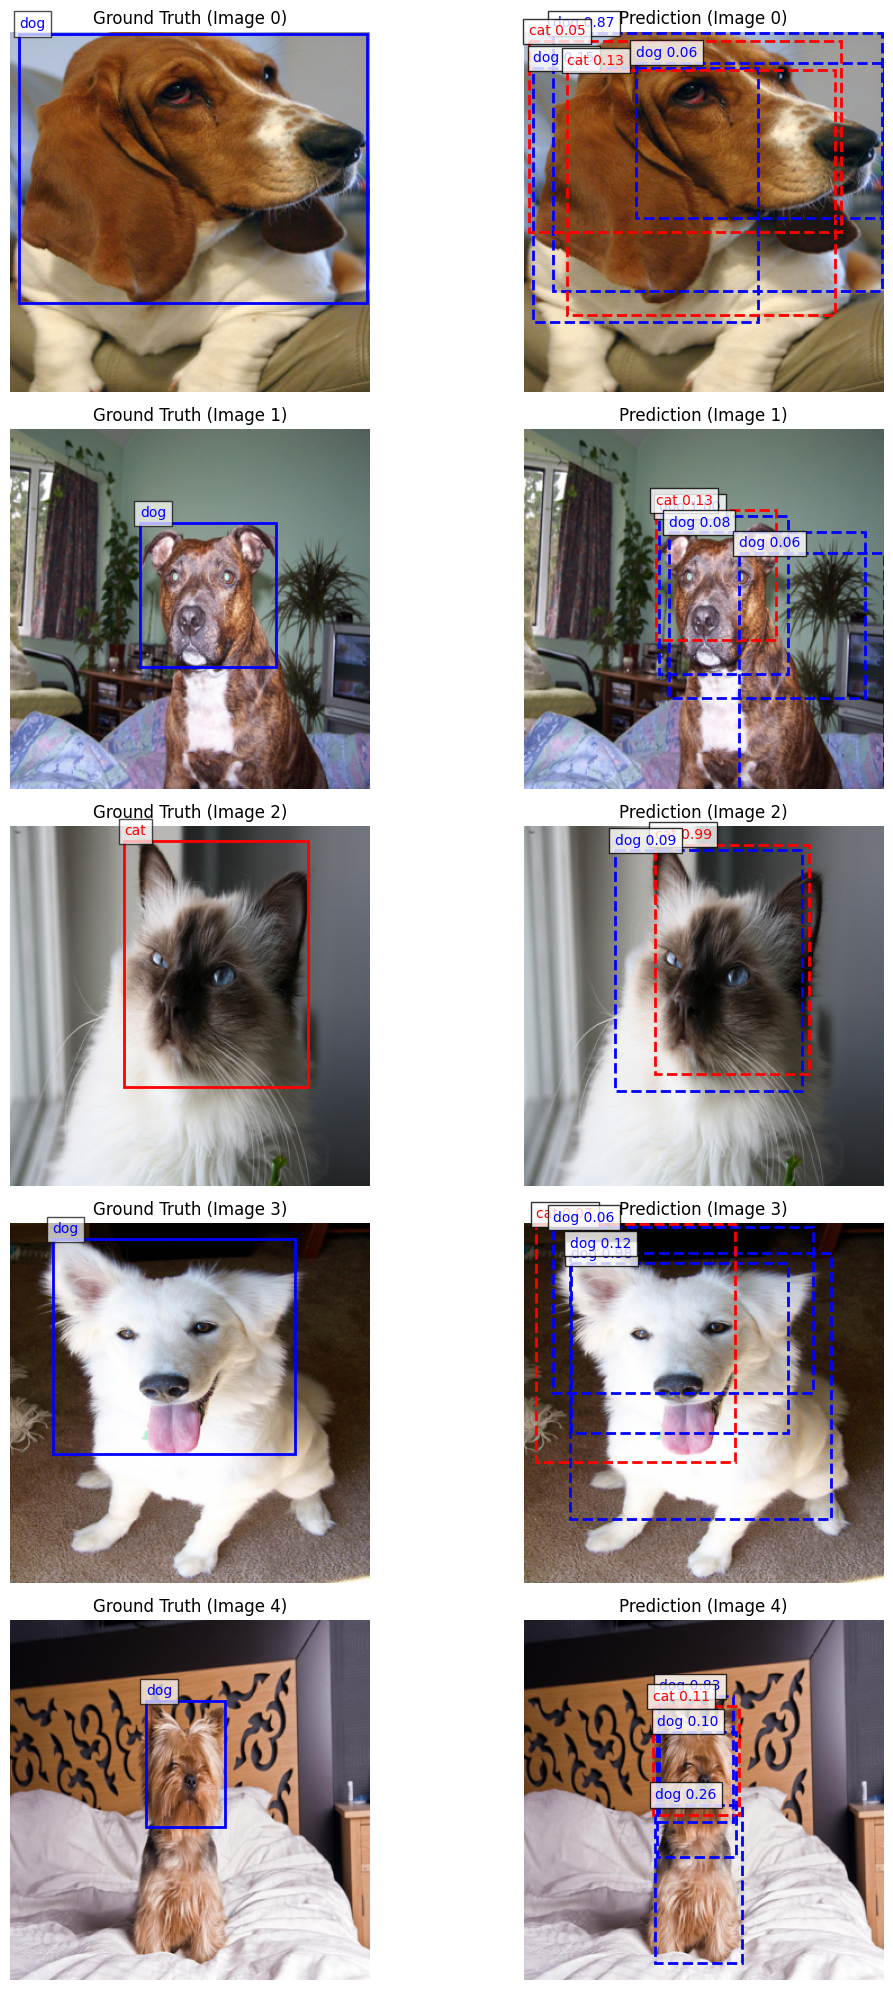

In [29]:
# ════════════════════════════════════════
# ▣ 학습된 모델 예측 시각화
# ════════════════════════════════════════

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_predictions(model, dataset, classes, device, num_samples=5, conf_threshold=0.05):
    """모델 예측 결과 시각화"""
    model.eval()

    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))

    for i in range(num_samples):
        # 데이터 로드
        image, target = dataset[i]

        # 예측
        with torch.no_grad():
            pred = model([image.to(device)])[0]

        # 이미지 변환 (tensor → numpy)
        img_np = image.permute(1, 2, 0).cpu().numpy()

        # Ground Truth 시각화
        ax1 = axes[i, 0] if num_samples > 1 else axes[0]
        ax1.imshow(img_np)
        ax1.set_title(f'Ground Truth (Image {i})')
        ax1.axis('off')

        for box, label in zip(target['boxes'], target['labels']):
            x_min, y_min, x_max, y_max = box.tolist()
            width, height = x_max - x_min, y_max - y_min

            # object_classes 사용 (background 제외)
            class_name = classes[label.item()]
            color = 'blue' if 'dog' in class_name.lower() else 'red'

            rect = patches.Rectangle(
                (x_min, y_min), width, height,
                linewidth=2, edgecolor=color, facecolor='none'
            )
            ax1.add_patch(rect)
            ax1.text(
                x_min, y_min - 5,
                f'{class_name}',
                color=color, fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7)
            )

        # Prediction 시각화
        ax2 = axes[i, 1] if num_samples > 1 else axes[1]
        ax2.imshow(img_np)
        ax2.set_title(f'Prediction (Image {i})')
        ax2.axis('off')

        # confidence threshold 이상만 표시
        mask = pred['scores'] > conf_threshold
        
        for box, label, score in zip(pred['boxes'][mask].cpu(), 
                                     pred['labels'][mask].cpu(), 
                                     pred['scores'][mask].cpu()):
            x_min, y_min, x_max, y_max = box.tolist()
            width, height = x_max - x_min, y_max - y_min
            
            # object_classes 사용
            class_name = classes[label.item()]
            color = 'blue' if 'dog' in class_name.lower() else 'red'
            
            rect = patches.Rectangle((x_min, y_min), width, height,
                                     linewidth=2, edgecolor=color, facecolor='none', linestyle='--')
            ax2.add_patch(rect)
            ax2.text(x_min, y_min - 5, f'{class_name} {score:.2f}', 
                    color=color, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig('prediction_comparison.png', dpi=150, bbox_inches='tight')
    print(f" 시각화 저장: prediction_comparison.png")
    plt.show()

# 학습된 모델로 시각화
print("\n" + "="*80)
print("학습된 모델 예측 시각화")
print("="*80)

# 모델 로드 (학습한 모델)
for model_name, config  in MODEL_CONFIGS.items():
    checkpoint_path = f'model_checkpoints/{model_name}_best.pt'

    if os.path.exists(checkpoint_path):
        model = MODEL_CONFIGS[model_name]['creator'](num_classes=num_classes, pretrained=True)
        model = model.to(device)
        model.load_state_dict(torch.load(checkpoint_path, map_location=device, weights_only=True))
        
        # 데이터셋 선택
        if '300' in model_name:
            vis_dataset = valid_dataset_300
        else:
            vis_dataset = val_dataset_320

        visualize_predictions(
            model,
            vis_dataset,
            classes,
            device,
            num_samples=5,
            conf_threshold=0.05
        )
    else:
        print(f" 체크포인트 파일을 찾을 수 없습니다: {checkpoint_path}")

threaload 초기 값이 너무 낮아서 MobileNet 백본에서는 오판단도 진행하는걸로 보여집니다.

미세조정 파인튜닝을 진행하겠습니다.


학습된 모델 예측 시각화

[create_ssd_vgg16] 시작: num_classes=3
[create_ssd_vgg16] Pretrained backbone 로드 완료
[create_ssd_vgg16] Head 교체:
  - in_channels: [512, 1024, 512, 256, 256, 256]
  - num_anchors: [4, 6, 6, 6, 4, 4]
  - num_classes: 3
[create_ssd_vgg16] 모델 생성 완료
  새로 선택된 인덱스: [64, 73, 827, 843, 355]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].


 시각화 저장: prediction_comparison.png


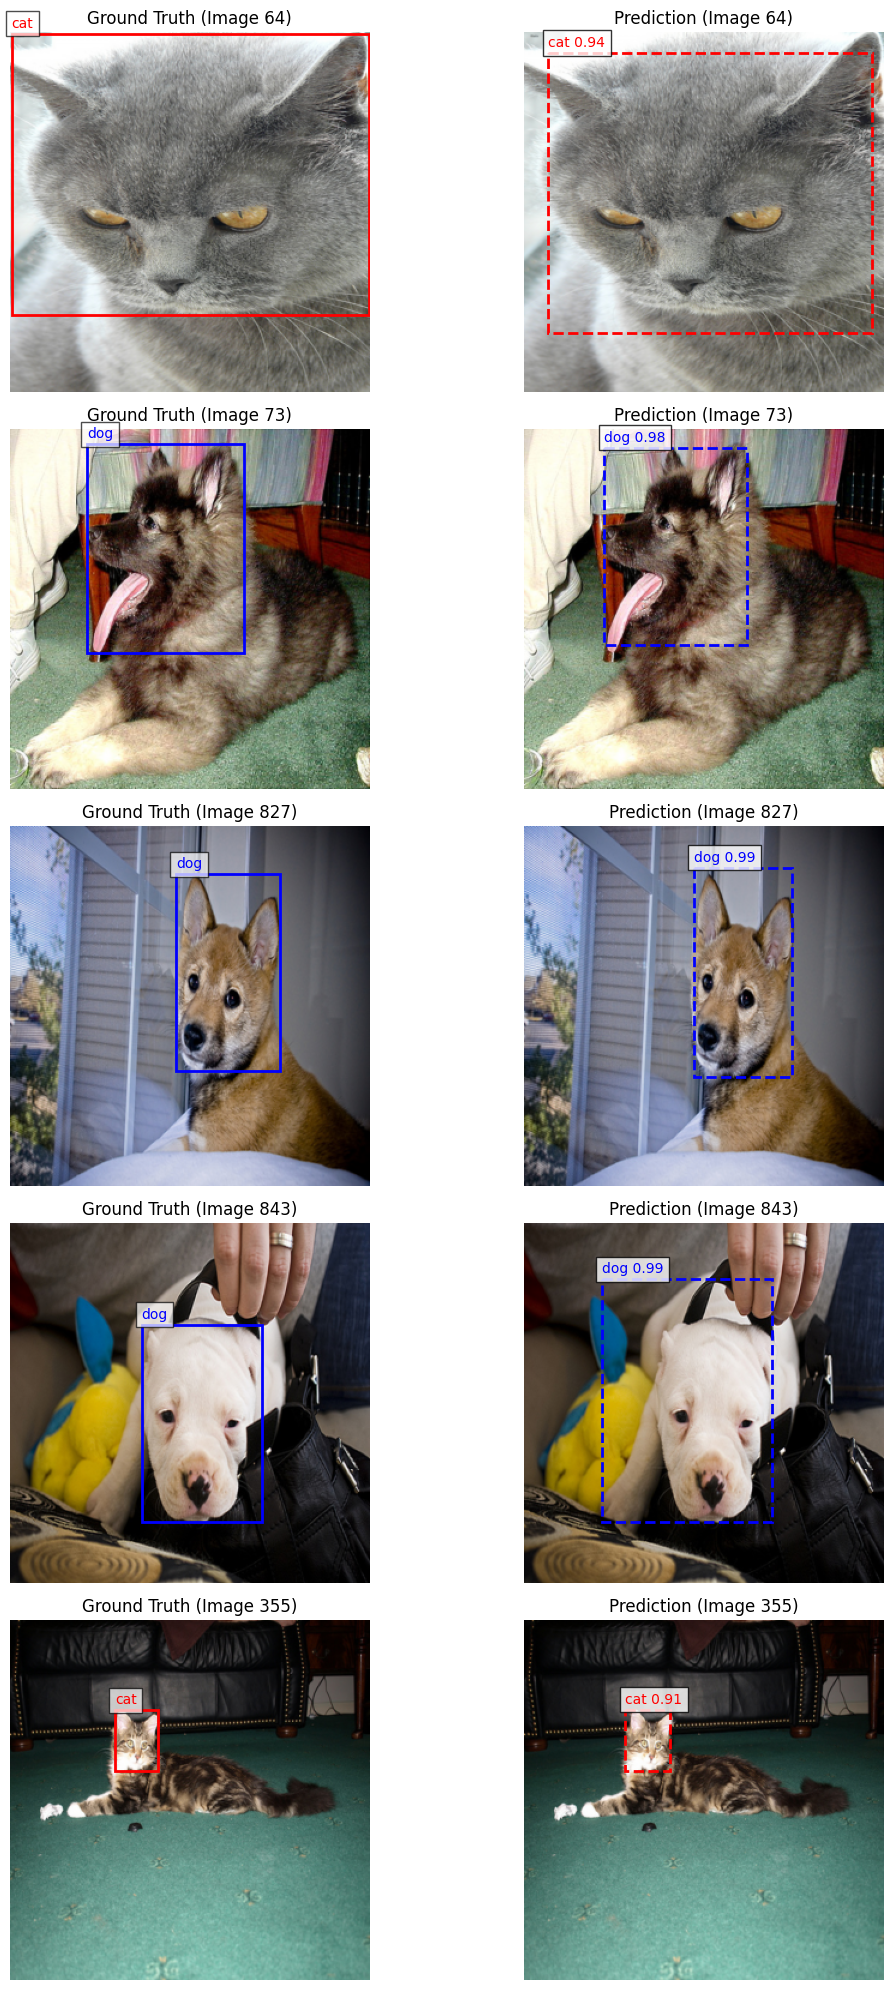


[create_ssd_mobilenet] 시작: num_classes=3
[create_ssd_mobilenet] 모델 생성 완료 (weights=None)
[create_ssd_mobilenet] 자동 추출:
  - in_channels: [672, 960, 512, 256, 256, 128]
  - num_anchors: [6, 6, 6, 6, 6, 6]
  - num_classes: 3
[create_ssd_mobilenet] Head 교체 완료


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04080563..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04080563..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].


  고정 인덱스 사용: [64, 73, 827, 843, 355]
 시각화 저장: prediction_comparison.png


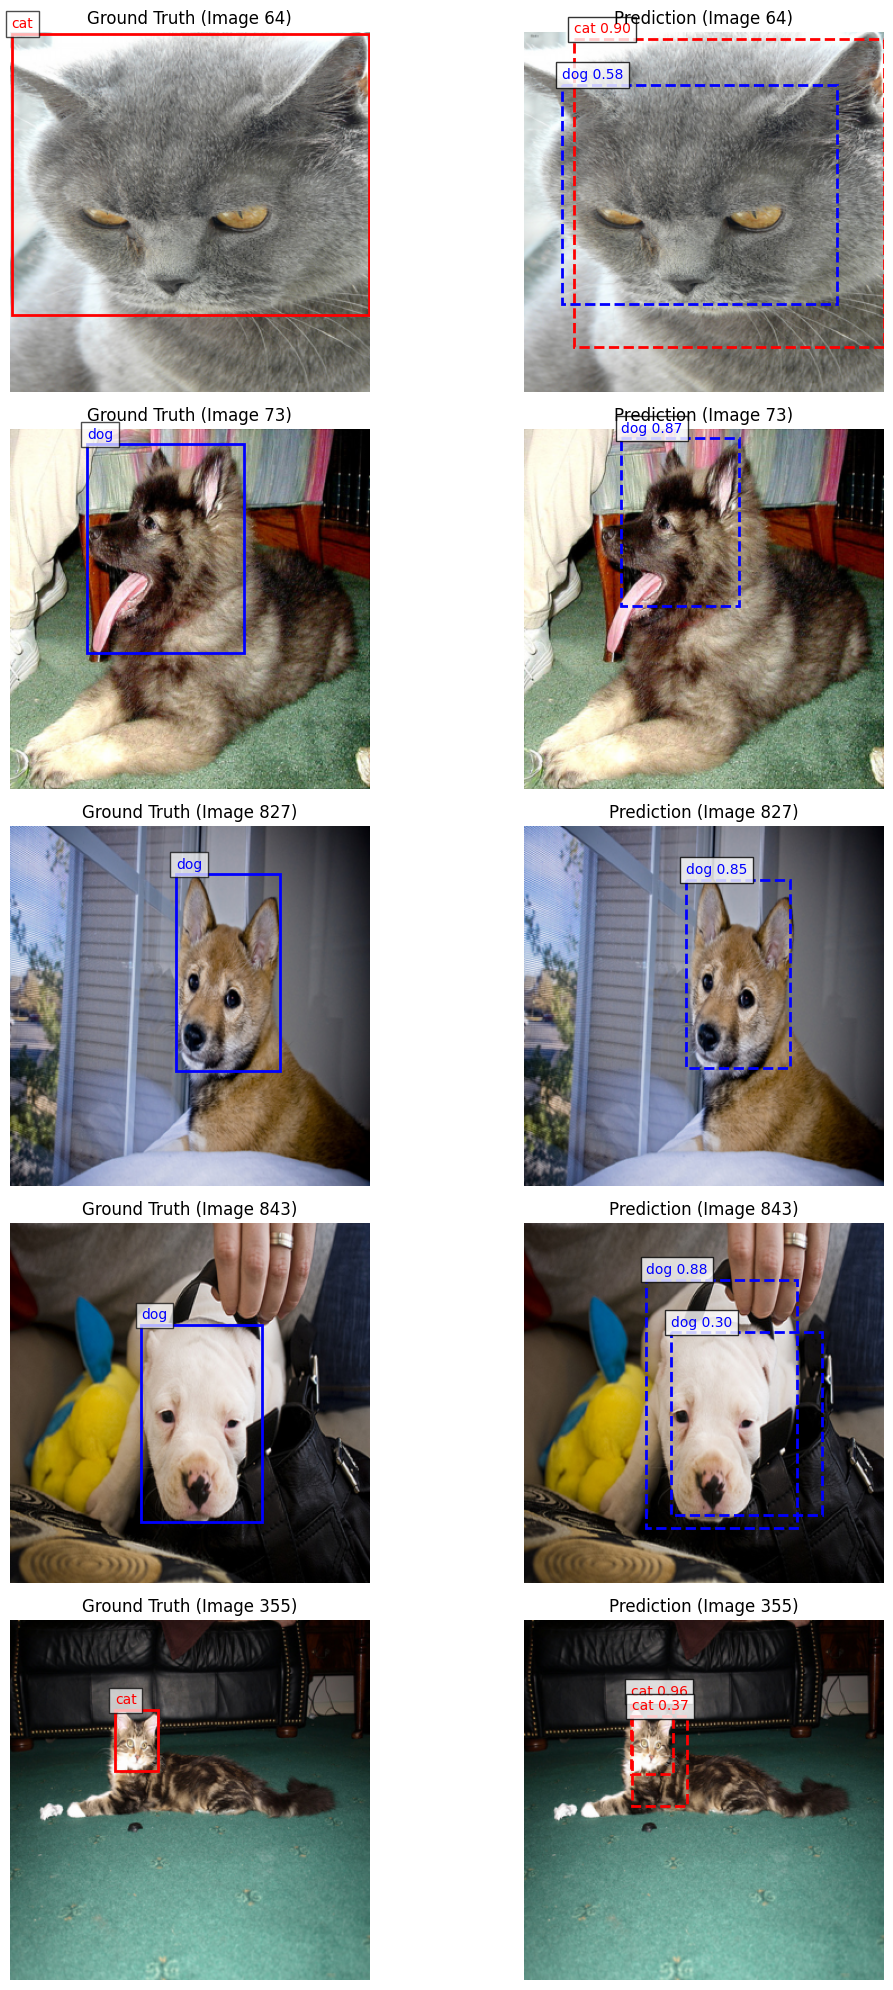

In [44]:
# ════════════════════════════════════════
# ▣ 학습된 모델 예측 시각화
# ════════════════════════════════════════

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from torchvision.ops import nms

def visualize_predictions(model, dataset, classes, device, num_samples=5, conf_threshold=0.05, random_sample=True, fixed_indices=None):
    """모델 예측 결과 시각화"""
    model.eval()
    
    # GT 있는 인덱스만 고르기 
    valid_indices = [i for i in range(len(dataset)) if len(dataset[i][1]['boxes']) > 0]
    
    # 랜덤 샘플링
    if fixed_indices is not None:
        indices = fixed_indices
        print(f"  고정 인덱스 사용: {indices}")
    elif random_sample:
        indices = random.sample(valid_indices, min(num_samples, len(valid_indices)))
        print(f"  새로 선택된 인덱스: {indices}")
    else:
        indices = valid_indices[:num_samples]
        print(f"  순차 인덱스 사용: {indices}")
    
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))

    for plot_idx, data_idx in enumerate(indices):
        # 데이터 로드
        image, target = dataset[data_idx]

        # 예측
        with torch.no_grad():
            pred = model([image.to(device)])[0]

        # 이미지 변환 (tensor → numpy)
        img_np = image.permute(1, 2, 0).cpu().numpy()

        # Ground Truth 시각화
        ax1 = axes[plot_idx, 0] if num_samples > 1 else axes[0]
        ax1.imshow(img_np)
        ax1.set_title(f'Ground Truth (Image {data_idx})')
        ax1.axis('off')

        for box, label in zip(target['boxes'], target['labels']):
            x_min, y_min, x_max, y_max = box.tolist()
            width, height = x_max - x_min, y_max - y_min

            # object_classes 사용 (background 제외)
            class_name = classes[label.item()]
            color = 'blue' if 'dog' in class_name.lower() else 'red'

            rect = patches.Rectangle(
                (x_min, y_min), width, height,
                linewidth=2, edgecolor=color, facecolor='none'
            )
            ax1.add_patch(rect)
            ax1.text(
                x_min, y_min - 5,
                f'{class_name}',
                color=color, fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7)
            )

        # Prediction 시각화
        ax2 = axes[plot_idx, 1] if num_samples > 1 else axes[1]
        ax2.imshow(img_np)
        ax2.set_title(f'Prediction (Image {data_idx})')
        ax2.axis('off')

        # confidence threshold 이상만 표시
        mask = pred['scores'] > conf_threshold
        
        for box, label, score in zip(pred['boxes'][mask].cpu(), 
                                     pred['labels'][mask].cpu(), 
                                     pred['scores'][mask].cpu()):
            x_min, y_min, x_max, y_max = box.tolist()
            width, height = x_max - x_min, y_max - y_min
            
            # object_classes 사용
            class_name = classes[label.item()]
            color = 'blue' if 'dog' in class_name.lower() else 'red'
            
            rect = patches.Rectangle((x_min, y_min), width, height,
                                     linewidth=2, edgecolor=color, facecolor='none', linestyle='--')
            ax2.add_patch(rect)
            ax2.text(x_min, y_min - 5, f'{class_name} {score:.2f}', 
                    color=color, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig('prediction_comparison.png', dpi=150, bbox_inches='tight')
    print(f" 시각화 저장: prediction_comparison.png")
    plt.show()
    
    return indices

# 학습된 모델로 시각화
print("\n" + "="*80)
print("학습된 모델 예측 시각화")
print("="*80)

# 모델마다 동일한 랜덤 이미지 보여주기
shared_indices = None

# 모델 로드 (학습한 모델)
for model_name, config  in MODEL_CONFIGS.items():
    checkpoint_path = f'model_checkpoints/{model_name}_best.pt'

    if os.path.exists(checkpoint_path):
        model = MODEL_CONFIGS[model_name]['creator'](num_classes=num_classes, pretrained=True)
        model = model.to(device)
        model.load_state_dict(torch.load(checkpoint_path, map_location=device, weights_only=True))
        
        # 데이터셋 선택
        if '300' in model_name:
            vis_dataset = valid_dataset_300
        else:
            vis_dataset = val_dataset_320

        shared_indices = visualize_predictions(
            model,
            vis_dataset,
            classes,
            device,
            num_samples=5,
            conf_threshold=0.3,
            random_sample=(shared_indices is None),
            fixed_indices=shared_indices
        )
    else:
        print(f" 체크포인트 파일을 찾을 수 없습니다: {checkpoint_path}")

## 결론

### 1. SSD300_VGG16 vs SSDLite320_MobileNetV3 최종 성능 비교

| 지표 | SSD300_VGG16 | SSDLite320_MobileNetV3 | 주요 특징 |
| :--- | :--- | :--- | :--- |
| **Test mAP** | **0.9071** | 0.8922 | VGG16이 약 1.5\% 더 높은 **정확도** 달성. |
| dog AP | 0.9050 | 0.8901 | |
| cat AP | 0.9091 | 0.8944 | |
| **Parameters** | 23.84M | **4.60M** | MobileNetV3가 **약 5.2배 경량**. |
| **Model Size** | 91.12 MB | **17.80 MB** | |
| **FPS (추론 속도)** | 15.58 | **28.12** | MobileNetV3가 **약 1.8배 빠름** (실시간 적합). |
| Training Time | 18.25 min | 7.04 min | |
| 최고 mAP Epoch | 4 | 6 | |

---

### 2. 모델별 학습 과정 요약

#### A. SSD300_VGG16 학습 요약

* **최고 성능:** Epoch 4에서 Validation mAP **0.9071**을 기록.
* **특징:** 정확도는 높지만, 학습 시간이 길고 (18.25분), 모델 사이즈가 큽니다. Early Stopping (Epoch 9)이 발동했습니다.

| Epoch | Train Loss | Validation mAP |
| :--- | :--- | :--- |
| 1 | 4.1450 | 0.8810 |
| 4 | 0.9921 | **0.9071** |
| 9 | 0.6594 | 0.9070 |

#### B. SSDLite320_MobileNetV3 학습 요약

* **최고 성능:** Epoch 6에서 Validation mAP **0.8922**를 기록.
* **특징:** 학습 시간이 매우 짧고 (7.04분), 모델이 경량화되어 있습니다. 실시간 처리에 유리하며, VGG16보다 약간 낮은 정확도를 보였습니다.

| Epoch | Train Loss | Validation mAP |
| :--- | :--- | :--- |
| 1 | 4.7035 | 0.7887 |
| 6 | 1.7092 | **0.8922** |
| 10 | 1.6465 | 0.8885 |

### 3. 정확도 vs. 효율성

두 모델의 비교는 객체 탐지 모델 설계의 핵심인 **정확도(Accuracy)** 와 **효율성(Efficiency)** 간의 상충 관계(Trade-off)를 명확하게 보여줍니다.

* **SSD300\_VGG16:** **VGG16** 백본의 강력함을 바탕으로 더 높은 **정확도(0.9071)**를 얻었으나, **느리고 무겁습니다**.
* **SSDLite320\_MobileNetV3:** **MobileNetV3** 백본과 SSDLite 구조를 통해 **4.60M**의 최소 파라미터로 **빠른 속도(28.12 FPS)**를 확보했으며, 정확도(0.8922)도 준수합니다.


### 4. 시각화 결과
* **SSD300\_VGG16:** **VGG16** 백본은 예측 박스가 매우 높으며 최종적으로 하나의 박스만 남는 모델의 높은 정확도를 확인하였습니다.
* **SSDLite320\_MobileNetV3:** **MobileNetV3** 백본은 배경이나 오검출을 하였습니다. 낮은 threadload=0.05 학습의 영향인것으로도 보입니다.

### 5. 결론
확실한 정확도가 필요하다면  **VGG16** 백본 모델을 구현하는게 좋아보이며

경량화된 모델에서는 **MobileNetV3** 백본을 구현하는게 좋은 판단으로 보입니다.

둘 다 비교 할 수 있어서 즐거운 실습이였습니다.